In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [23]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [3]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [4]:
import pickle
X=df.drop('sepal_length',axis=1)
y=df['sepal_length']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

with open ('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler,scaler_file)

with open('scaler.pkl','rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)
    

In [5]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred_log_reg=log_reg.predict(X_test)

accuracy_log_reg=accuracy_score(y_test,y_pred_log_reg)
conf_matrix_log_reg=confusion_matrix(y_test,y_pred_log_reg)
class_report_log_reg=classification_report(y_test,y_pred_log_reg)
print(f"Logistic Regression Accuracy:{accuracy_log_reg:.2f}")
print('confusion_matrix:')
print(conf_matrix_log_reg)
print('classification_report:')
print(class_report_log_reg)

filname = 'log_model.pkl'
pickle.dump(log_reg,open(filname,'wb'))
loaded_model = pickle.load(open(filname,'rb'))


Logistic Regression Accuracy:1.00
confusion_matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred_tree=tree_clf.predict(X_test)
accuracy_tree=accuracy_score(y_test,y_pred_tree)
conf_matrix_tree=confusion_matrix(y_test,y_pred_tree)
class_report_tree=classification_report(y_test,y_pred_tree)
print(f'Decision Tree accuracy;{accuracy_tree:.2f}')
print('Confusion matrix:')
print(conf_matrix_tree)
print('classification_report')
print(class_report_tree)

Decision Tree accuracy;1.00
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
y_pred_knn=knn_clf.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
conf_matrix_knn=confusion_matrix(y_test,y_pred_knn)
class_report_knn=classification_report(y_test,y_pred_knn)
print(f'k-NN Accuracy;{accuracy_knn:.2f}')
print('Confusion matrix:')
print(conf_matrix_knn)
print('classification_report')
print(class_report_knn)


k-NN Accuracy;1.00
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



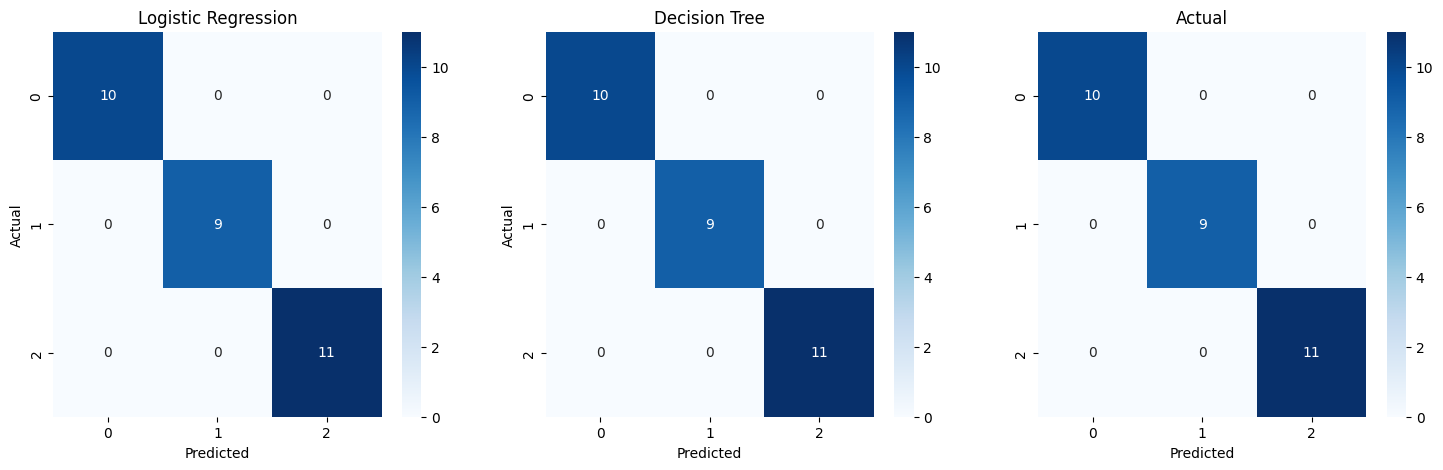

In [8]:
#visualizing the confusion matrices
fig,axes=plt.subplots(1,3,figsize=(18,5))
#logistic regression
sns.heatmap(conf_matrix_log_reg,annot=True,fmt='d',cmap='Blues',ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

#Decision Tree
sns.heatmap(conf_matrix_tree,annot=True,fmt='d',cmap='Blues',ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

#k-NN
sns.heatmap(conf_matrix_knn,annot=True,fmt='d',cmap='Blues',ax=axes[2])
axes[2].set_title('k-NN')
axes[2].set_xlabel('Predicted')
axes[2].set_title('Actual')
plt.show()

In [9]:
import pickle
import numpy as np

def infer_iris_species(model_path, scaler_path, input_features):
    """
    Perform inferencing on the Iris dataset.
    
    Parameters:
    - model_path (str): Path to the saved model pickle file.
    - scaler_path (str): Path to the saved scaler pickle file.
    - input_features (list): List of input features in the following order:
        [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
    
    Returns:
    - str: Predicted Iris species: "Setosa", "Versicolor", or "Virginica".
    """
    try:
        # Load the trained model and scaler
        with open(model_path, 'rb') as model_file:
            model = pickle.load(model_file)
        
        with open(scaler_path, 'rb') as scaler_file:
            scaler = pickle.load(scaler_file)
        
        # Ensure the input features are in the correct format
        input_array = np.array(input_features).reshape(1, -1)
        
        # Scale the input features
        scaled_input = scaler.transform(input_array)
        
        # Predict the target
        prediction = model.predict(scaled_input)[0]
        
        # Map target values to species names
        target_mapping = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
        
        # Return the predicted species
        return target_mapping.get(prediction, "Unknown")
    
    except Exception as e:
        return f"An error occurred: {e}"


In [10]:
# Example input: Sepal length=5.1, Sepal width=3.5, Petal length=1.4, Petal width=0.2
input_features = [5.1, 3.5, 1.4, 0.2]

# Paths to your saved model and scaler files
model_path = 'log_model.pkl'
scaler_path = 'scaler.pkl'

# Infer species
result = infer_iris_species(model_path, scaler_path, input_features)
print(f"The predicted species is: {result}")


The predicted species is: Setosa


c:\Users\Chaitanya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
import pickle

X=df.drop('sepal length (cm)',axis=1)
y=df['sepal length (cm)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression' : Lasso(),
    'Decision Tree Regression' : DecisionTreeRegressor()
}
# with open ('scaler.pkl', 'wb') as scaler_file:
#     pickle.dump(scaler,scaler_file)

# with open('scaler.pkl','rb') as scaler_file:
#     loaded_scaler = pickle.load(scaler_file)


In [5]:
results = pd.DataFrame(columns=["Model", 'MSE', 'MAE', "R2_Score"])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = pd.concat([results, pd.DataFrame({
        'Model': [model_name],
        'MSE' : [mse],
        'MAE': [mae],
        'R2_Score': [r2]
    })], ignore_index=True)

print(results)

                      Model       MSE       MAE  R2_Score
0         Linear Regression  0.100016  0.235709  0.855106
1          Ridge Regression  0.093400  0.229727  0.864691
2          Lasso Regression  0.523988  0.581865  0.240891
3  Decision Tree Regression  0.219833  0.380000  0.681524


C:\Users\Chaitanya\AppData\Local\Temp\ipykernel_15792\4090289597.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


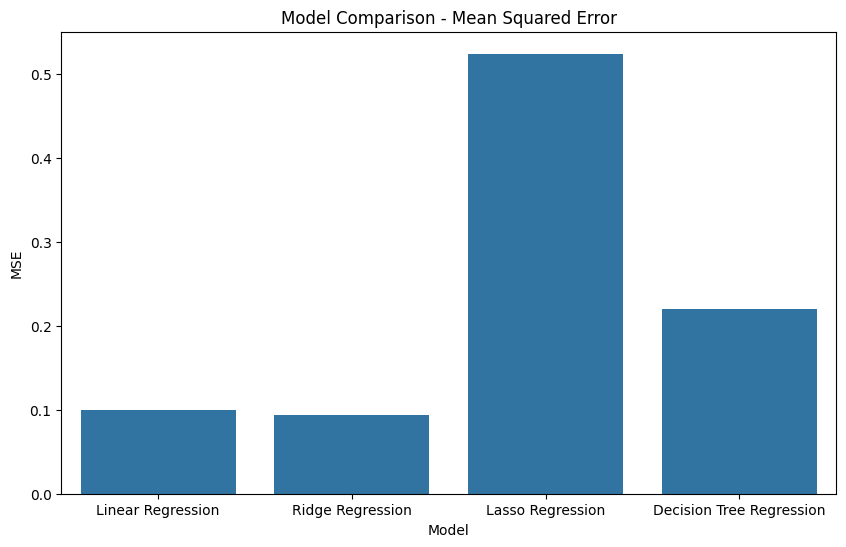

In [6]:
#Regression Visualizaiton

plt.figure(figsize=(10,6))
sns.barplot(x = "Model", y  = 'MSE', data=results)
plt.title("Model Comparison - Mean Squared Error")
plt.show()

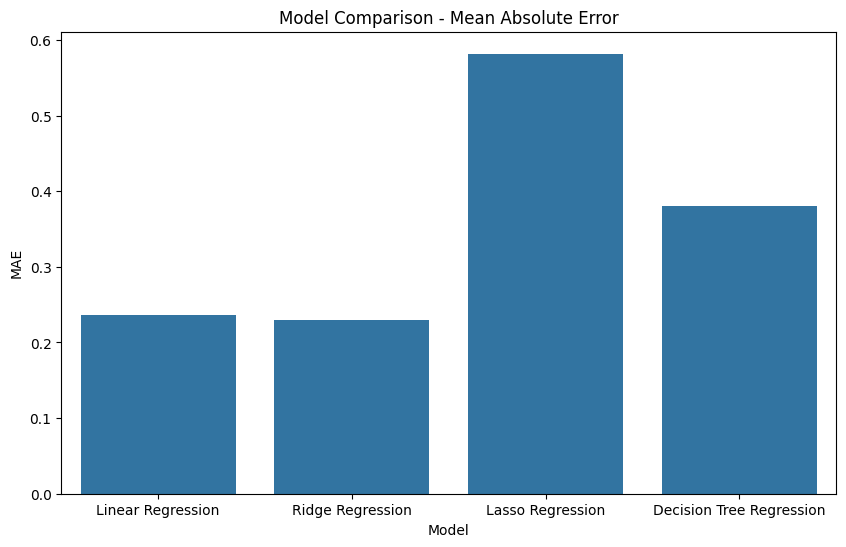

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='MAE', data=results)
plt.title("Model Comparison - Mean Absolute Error")
plt.show()

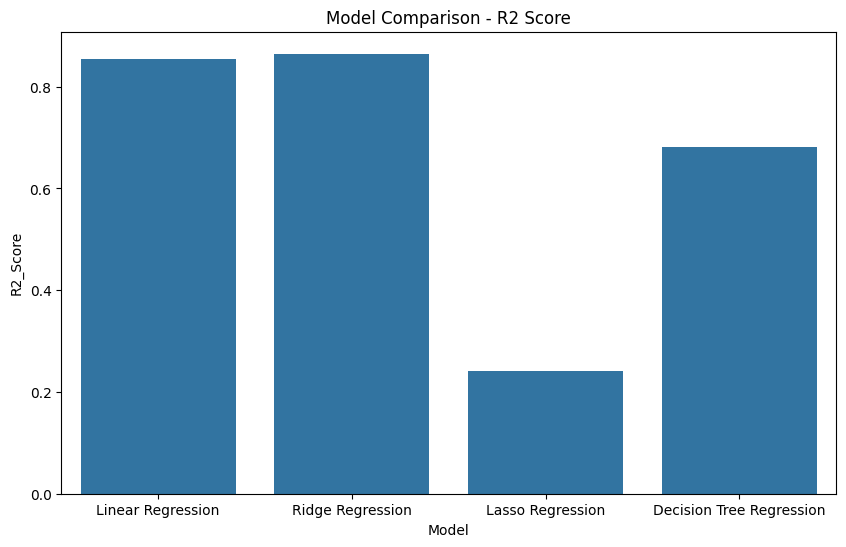

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='R2_Score', data=results)
plt.title('Model Comparison - R2 Score')
plt.show()